# import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import pickle

# read data

In [9]:
#function for reading data
def read_data(path_data):
    df_data=pd.read_csv(path_data)
    df_data_copy = df_data.copy()
    return df_data,df_data_copy

In [10]:
#call function for reading data
path_data="D:/studies/depi/ottawa/second term/ai for cs/ass/ass2/training_dataset.csv"
df_data,df_data_copy=read_data(path_data)

# show data and get some information about data

In [11]:
#show data
df_data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Label
0,58:50.7,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
1,58:50.3,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
2,58:49.9,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
3,58:49.5,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
4,58:49.1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536133,18:56.6,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
536134,18:56.2,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
536135,18:55.8,25,8,0,10,9,2.556642,6,6,7,3.333333,2,192,12,1,0
536136,18:55.4,25,8,0,10,9,2.556642,6,6,7,3.333333,2,192,12,1,0


In [12]:
#some info about data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536138 entries, 0 to 536137
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         536138 non-null  object 
 1   FQDN_count        536138 non-null  int64  
 2   subdomain_length  536138 non-null  int64  
 3   upper             536138 non-null  int64  
 4   lower             536138 non-null  int64  
 5   numeric           536138 non-null  int64  
 6   entropy           536138 non-null  float64
 7   special           536138 non-null  int64  
 8   labels            536138 non-null  int64  
 9   labels_max        536138 non-null  int64  
 10  labels_average    536138 non-null  float64
 11  longest_word      536124 non-null  object 
 12  sld               536138 non-null  object 
 13  len               536138 non-null  int64  
 14  subdomain         536138 non-null  int64  
 15  Label             536138 non-null  int64  
dtypes: float64(2), int64

In [13]:
# count label in data
df_data['Label'].value_counts()

1    294353
0    241785
Name: Label, dtype: int64

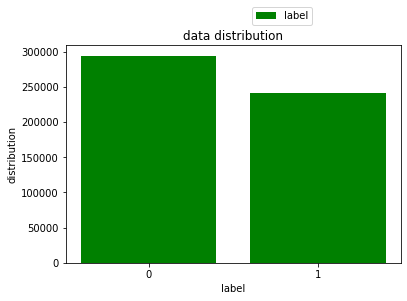

In [14]:
#plot count label in data
x_1 = np.arange(2)
plt.bar(x_1, df_data['Label'].value_counts(),color='g')
plt.xticks(x_1,[0,1])
plt.xlabel("label")
plt.ylabel("distribution")
plt.title('data distribution')
plt.legend(["label"],bbox_to_anchor =(0.75, 1.2))
plt.show()

# preprocessing data and split data to features and label (x,y)

In [15]:
#drop timestamp column from data
def del_col(data,col):
    data=data.drop(col, axis=1)
    return data

In [16]:
#col function fro drop coulmn
df_data=del_col(df_data,'timestamp')
df_data=del_col(df_data,'longest_word')
df_data=del_col(df_data,'sld')

In [17]:
df_data

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Label
0,24,7,0,10,8,2.054029,6,6,7,3.166667,11,1,1
1,24,7,0,10,8,2.054029,6,6,7,3.166667,11,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,1
3,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,1
4,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536133,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,0
536134,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,0
536135,25,8,0,10,9,2.556642,6,6,7,3.333333,12,1,0
536136,25,8,0,10,9,2.556642,6,6,7,3.333333,12,1,0


In [14]:
#label encode two columns
#def encode_col(data,col):
#    data[col]=LabelEncoder().fit_transform(data[col])
#    return data

In [15]:
#call function encode_col
#df_data=encode_col(df_data,'longest_word')
#df_data=encode_col(df_data,'sld')

In [18]:
#function for split data for label and features
def split_data(data):
    x=data.iloc[:,0:-1]
    y=data.iloc[:,-1]
    return x,y

In [19]:
x,y=split_data(df_data)

In [20]:
#split data to train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

# show data after preprocessing

In [21]:
#show all data
df_data

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Label
0,24,7,0,10,8,2.054029,6,6,7,3.166667,11,1,1
1,24,7,0,10,8,2.054029,6,6,7,3.166667,11,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,1
3,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,1
4,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536133,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,0
536134,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,0
536135,25,8,0,10,9,2.556642,6,6,7,3.333333,12,1,0
536136,25,8,0,10,9,2.556642,6,6,7,3.333333,12,1,0


In [22]:
#show features
x

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain
0,24,7,0,10,8,2.054029,6,6,7,3.166667,11,1
1,24,7,0,10,8,2.054029,6,6,7,3.166667,11,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1
3,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1
4,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
536133,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1
536134,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1
536135,25,8,0,10,9,2.556642,6,6,7,3.333333,12,1
536136,25,8,0,10,9,2.556642,6,6,7,3.333333,12,1


In [23]:
#show label
y

0         1
1         1
2         1
3         1
4         1
         ..
536133    0
536134    0
536135    0
536136    0
536137    0
Name: Label, Length: 536138, dtype: int64

In [24]:
#sample from data
data_sample=df_data.sample(n=2000,random_state=0)

C:\Users\abdo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\abdo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


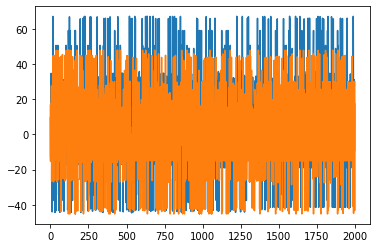

In [25]:
#plot data in 2D after using tsne
data_tsne = TSNE(n_components=2,random_state=0)
data__tsne = data_tsne.fit_transform(data_sample)
plt.plot(data__tsne)

C:\Users\abdo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\abdo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

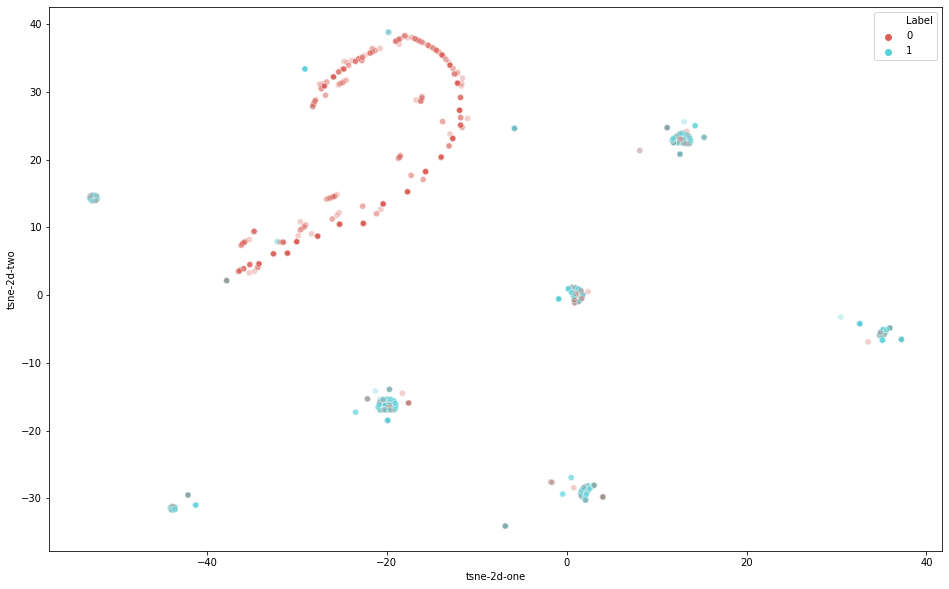

In [26]:
#plot data with label in 2D after using tsne
data_tsne=TSNE(n_components=2, random_state=0).fit_transform(data_sample.iloc[:,0:-1])
train_ts=pd.DataFrame(data_sample.iloc[:,-1])
train_ts['tsne-2d-one'] = data_tsne[:,0]
train_ts['tsne-2d-two'] = data_tsne[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Label",
    palette=sns.color_palette("hls", 2),
    data=train_ts,
    legend="full",
    alpha=0.3
)

# part 1

# Apply more models on training and testing data and evaluation model

In [27]:
#function for applying model
catBoost_confidence_score=[]
def model(model,x__train,x__test,y__train,y__test):
    model.fit(x__train, y__train)
    y_pred_c=model.predict(x__test)
    print("f1 score for model",f1_score(y__test, y_pred_c))
    print("accuracy for model",accuracy_score(y__test, y_pred_c))
    print(classification_report(y__test, y_pred_c))
    plot_confusion_matrix(model, x__test, y__test)

# CatBoostClassifier1

f1 score for model 0.8604089164884736
accuracy for model 0.8222292684746522
              precision    recall  f1-score   support

           0       1.00      0.61      0.76     48435
           1       0.76      1.00      0.86     58793

    accuracy                           0.82    107228
   macro avg       0.88      0.80      0.81    107228
weighted avg       0.87      0.82      0.81    107228



C:\Users\abdo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


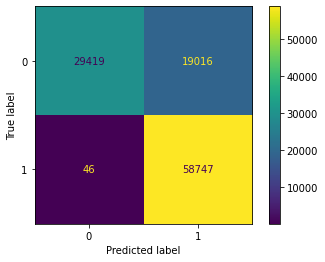

In [28]:
#call function for applying model
clf_c=CatBoostClassifier(iterations=1000,verbose=0,learning_rate=0.01,random_state=0)
model(clf_c,x_train,x_test,y_train,y_test)

# Random forest

f1 score for model 0.8605778383048514
accuracy for model 0.8224157869213266
              precision    recall  f1-score   support

           0       1.00      0.61      0.76     48435
           1       0.76      1.00      0.86     58793

    accuracy                           0.82    107228
   macro avg       0.88      0.80      0.81    107228
weighted avg       0.87      0.82      0.81    107228



C:\Users\abdo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


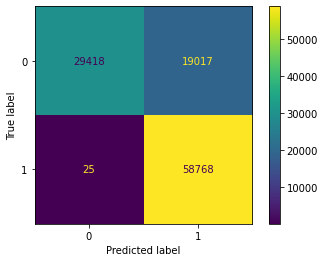

In [31]:
#call function for applying model
clf_r=RandomForestClassifier(n_estimators=450,n_jobs=-1,random_state=0)
model(clf_r,x_train,x_test,y_train,y_test)

# LogisticRegression

C:\Users\abdo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1 score for model 0.8585806716647838
accuracy for model 0.8202148692505689
              precision    recall  f1-score   support

           0       0.99      0.61      0.75     48435
           1       0.75      1.00      0.86     58793

    accuracy                           0.82    107228
   macro avg       0.87      0.80      0.81    107228
weighted avg       0.86      0.82      0.81    107228



C:\Users\abdo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


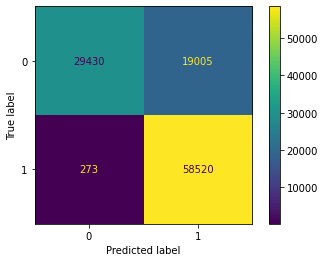

In [29]:
clf_l=LogisticRegression(random_state=0)
model(clf_l,x_train,x_test,y_train,y_test)

# save model CatBoostClassifier

In [32]:
pickle.dump(clf_c, open('D:/studies/depi/ottawa/second term/ai for cs/ass/ass2/catboost_.sav','wb'))